In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seastar as ss
from cycler import cycler


In [2]:
azi_step =  5
inci_step = 5

pol   =  np.array([1, 2])
wspd  =  np.array([3, 5, 7, 10, 15, 20, 30])
theta =  np.arange(15, 60, inci_step)
azi   =  np.arange(0, 181, azi_step)

[wspd_mat, theta_mat, azi_mat, pol_mat] =  np.meshgrid(wspd, theta, azi, pol, indexing='ij')

In [3]:
s0_lin = ss.gmfs.nrcs.nscat4ds(
    wspd_mat,
    azi_mat,
    theta_mat,
    pol_mat,
)

In [4]:
ds = xr.Dataset(
    data_vars=dict(
        sigma0_lin=(['wspd','inci','azi','pol'], s0_lin)
    ),
    coords=dict(
        wspd=wspd,
        inci=theta,
        azi=azi,
        pol=pol
    )
)

# Figures for SciReC paper

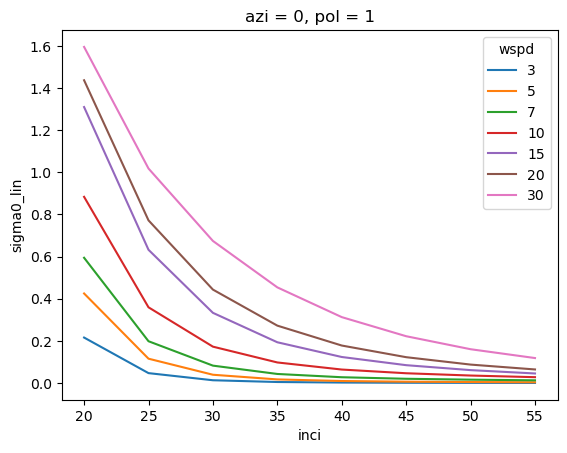

In [5]:
fig = plt.figure()
ax = plt.gca()
# colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, ds.azi.size)]
# ax.set_prop_cycle('color', colors)
# import seaborn as sns
# sns.color_palette('viridis', as_cmap=True)

ds.sigma0_lin.sel(azi=0).sel(pol=1).plot(x='inci', hue='wspd')

# General figures

In [6]:
ds['sigma0_dB'] = 10 * np.log10(ds.sigma0_lin)

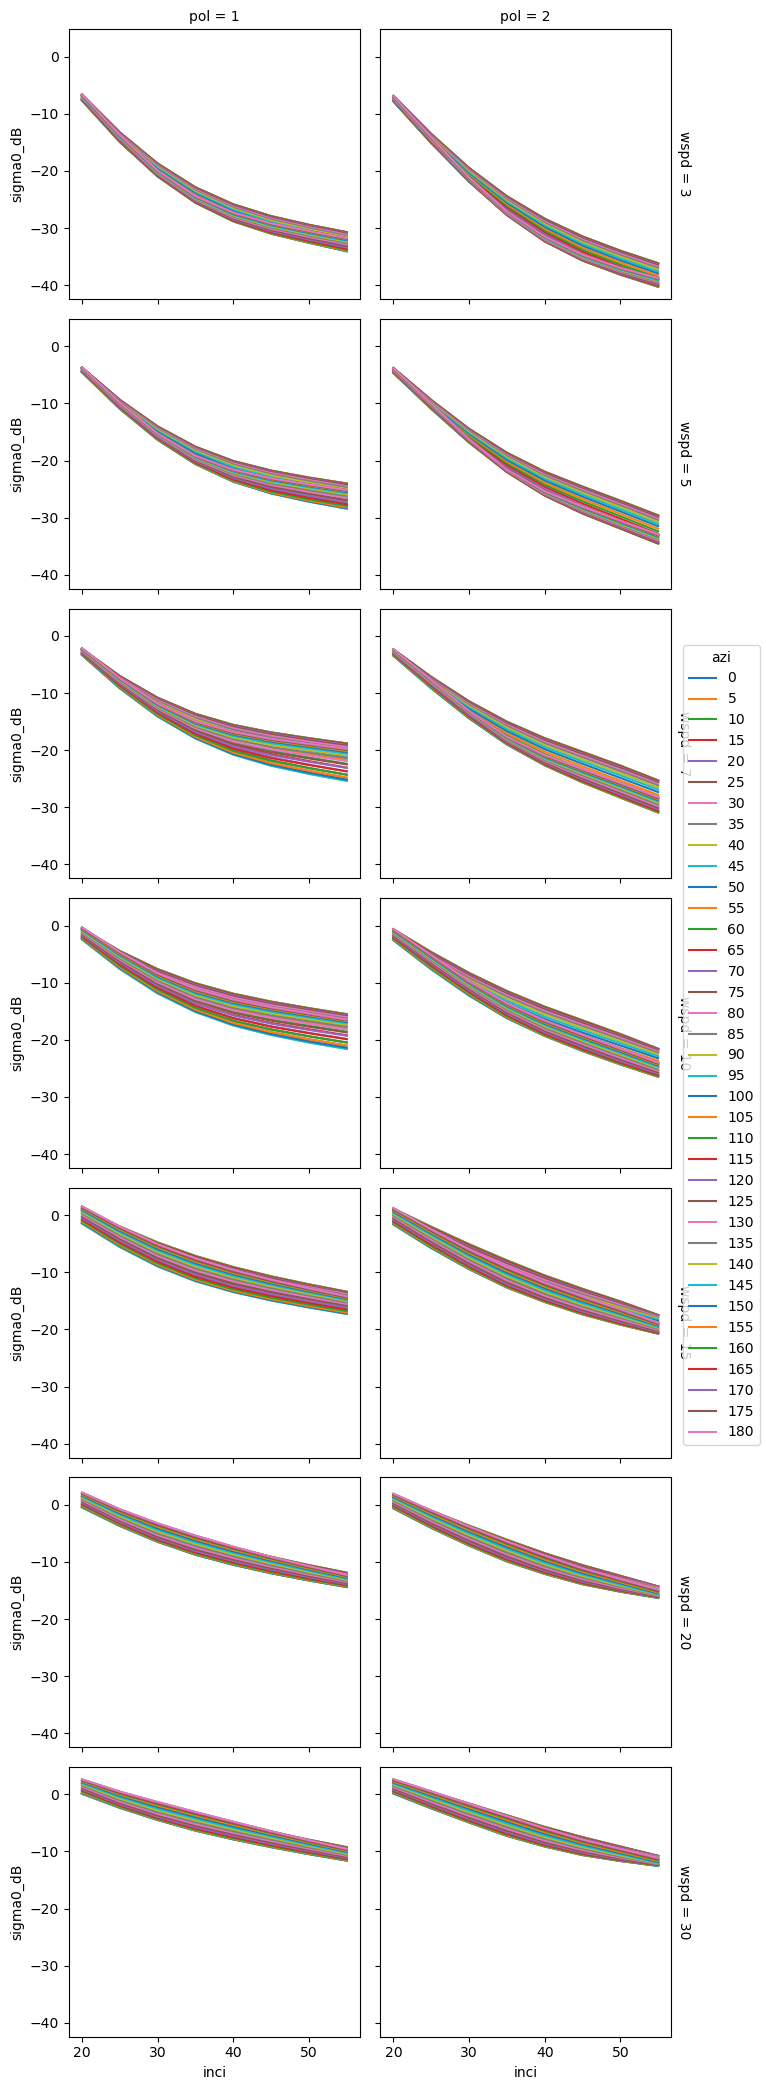

In [7]:
# fig = plt.figure()
# ax = plt.gca()
# colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, ds.azi.size)]
# ax.set_prop_cycle('color', colors)
# import seaborn as sns
# sns.color_palette('viridis', as_cmap=True)
ds.sigma0_dB.plot(
    x='inci', hue='azi', col='pol', row='wspd',
#     hue_kws={'color':colors}
)

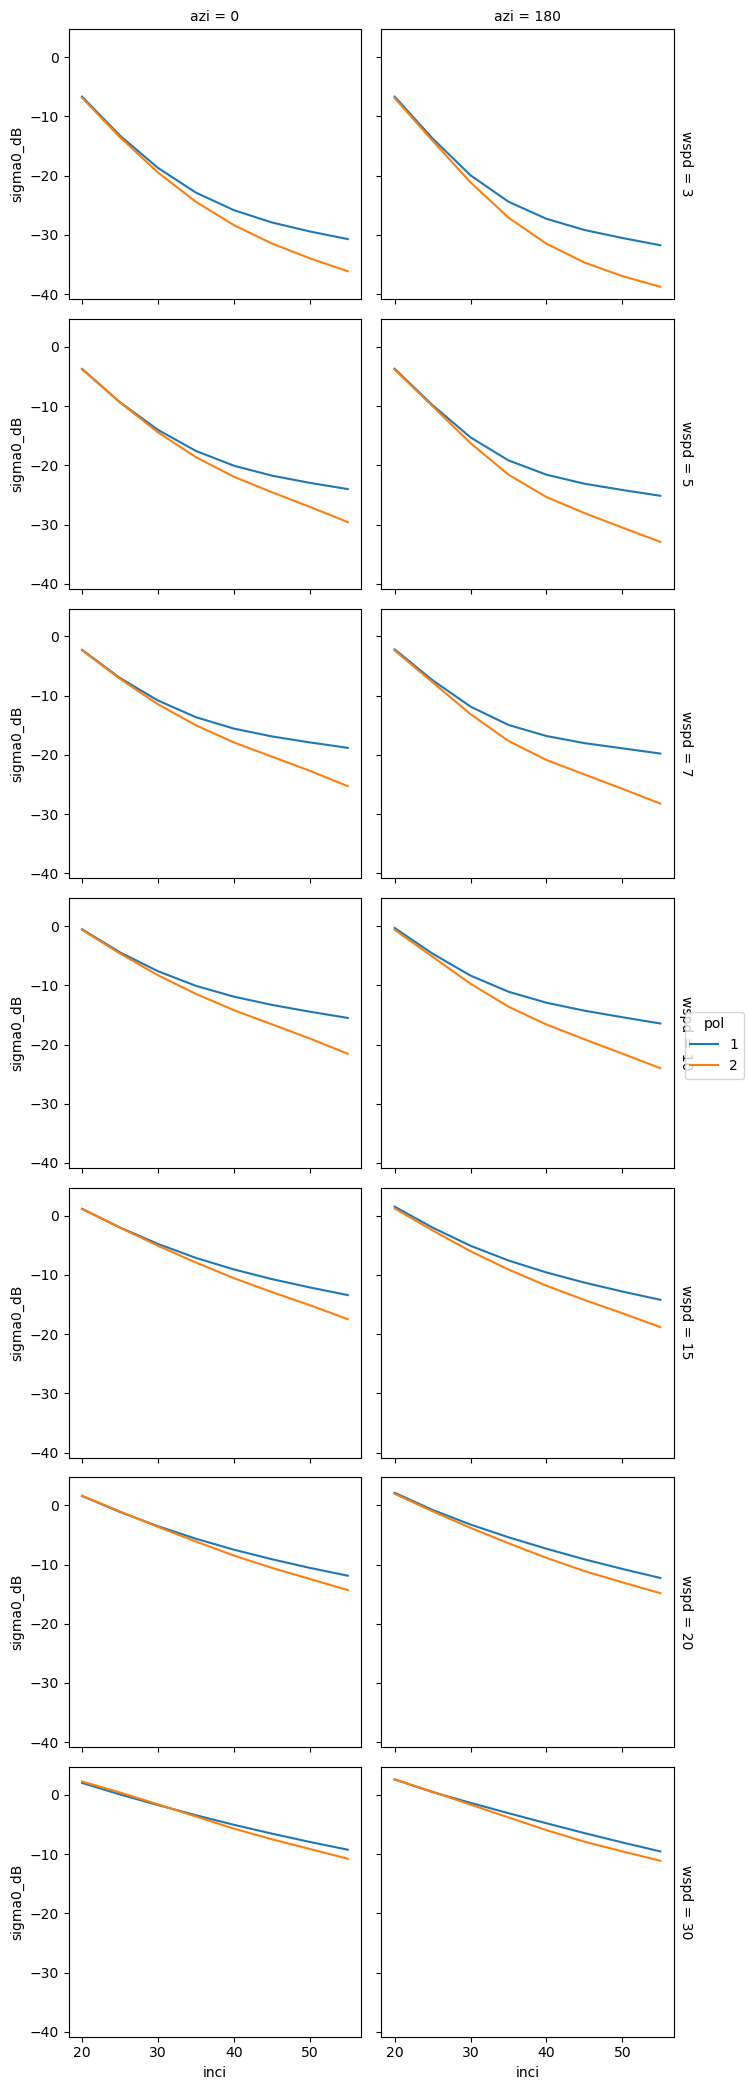

In [8]:
ds.sigma0_dB.sel(azi=[0,180]).plot(
    x='inci', hue='pol', col='azi', row='wspd',
)

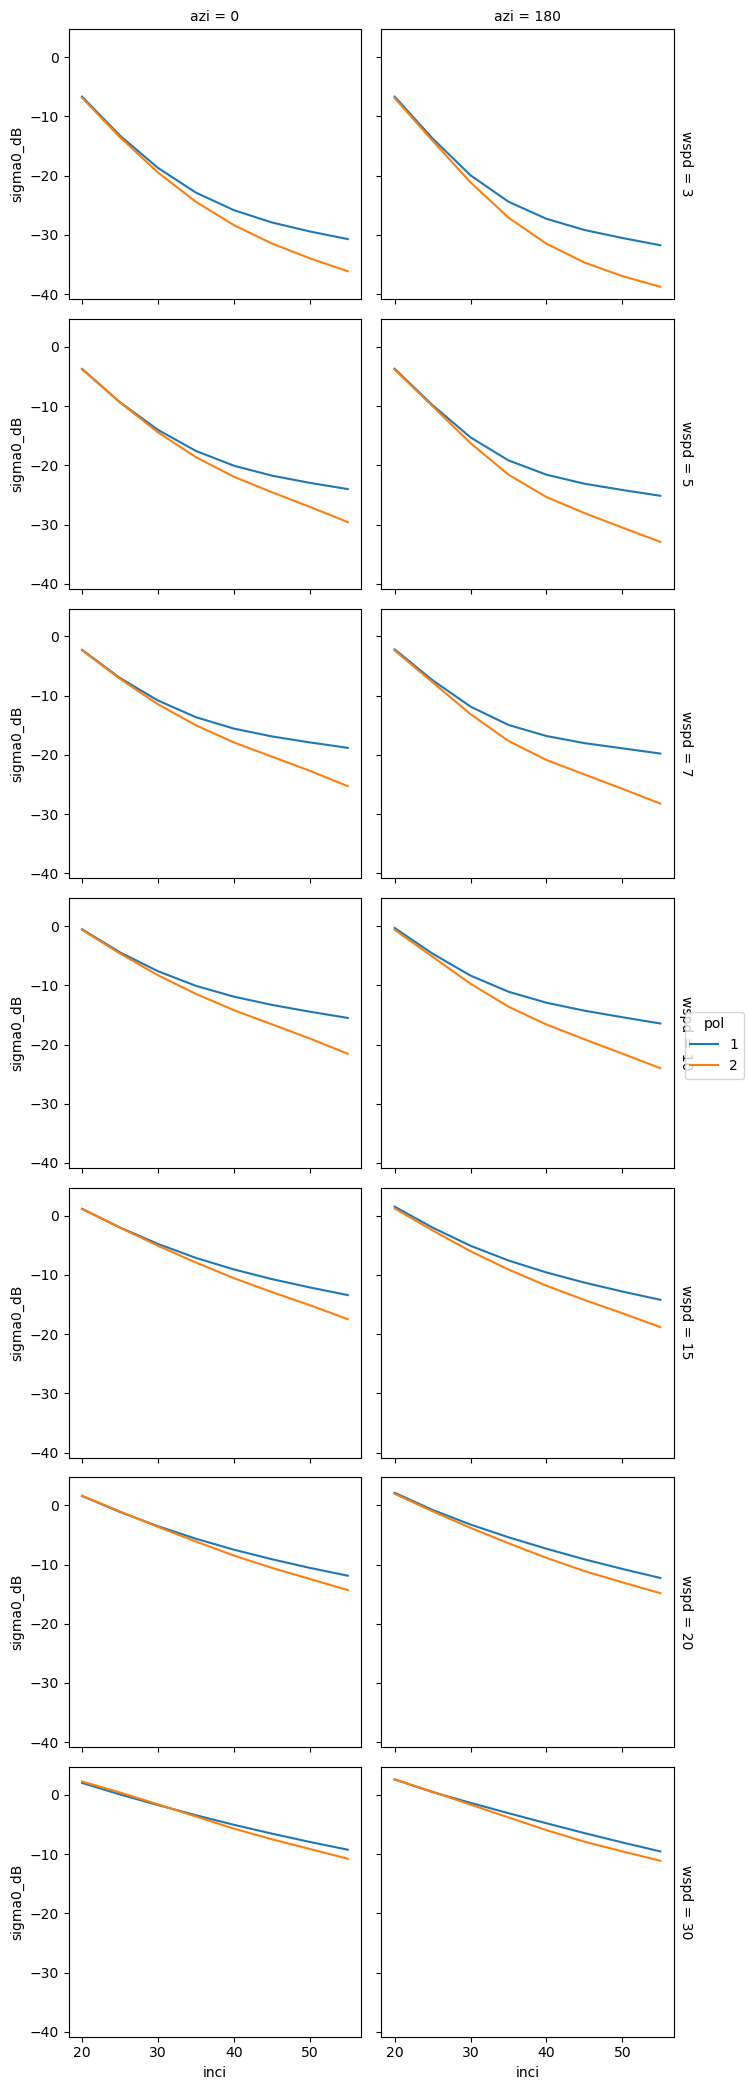

In [9]:
ds.sigma0_dB.sel(azi=[0,180]).plot(
    x='inci', hue='pol', col='azi', row='wspd',
)

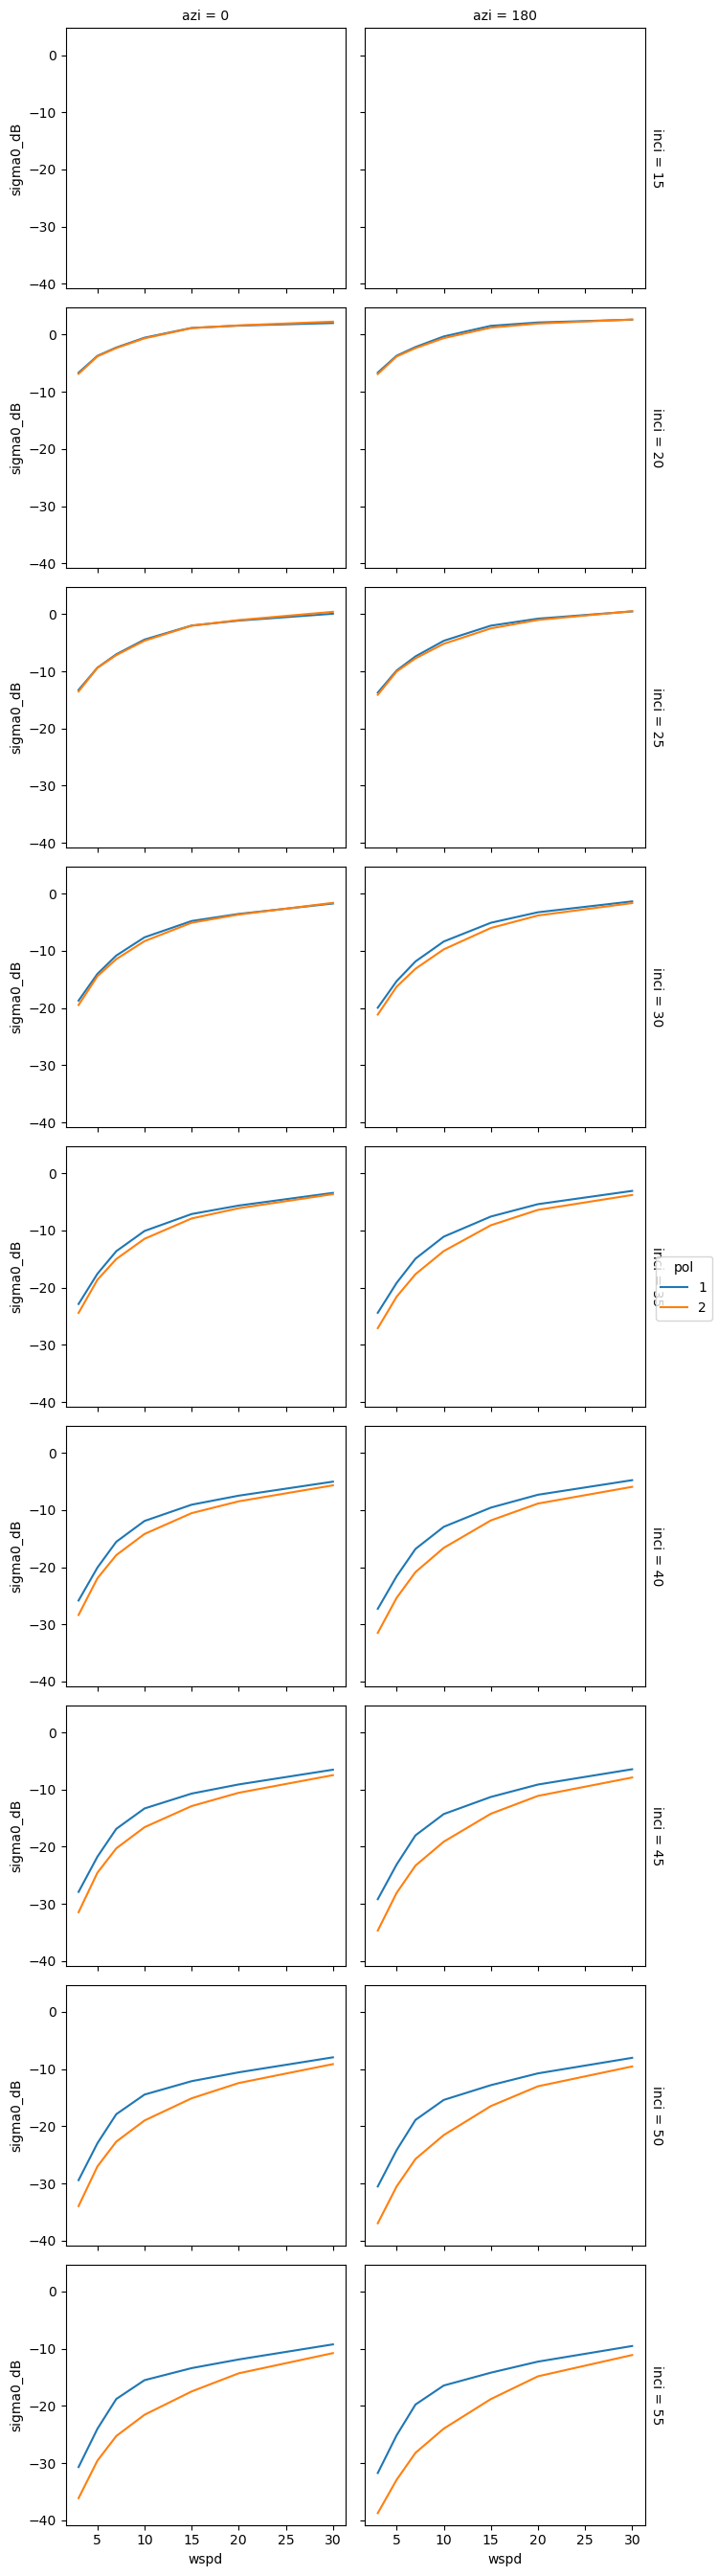

In [10]:
ds.sigma0_dB.sel(azi=[0,180]).plot(
    x='wspd', hue='pol', col='azi', row='inci',
)

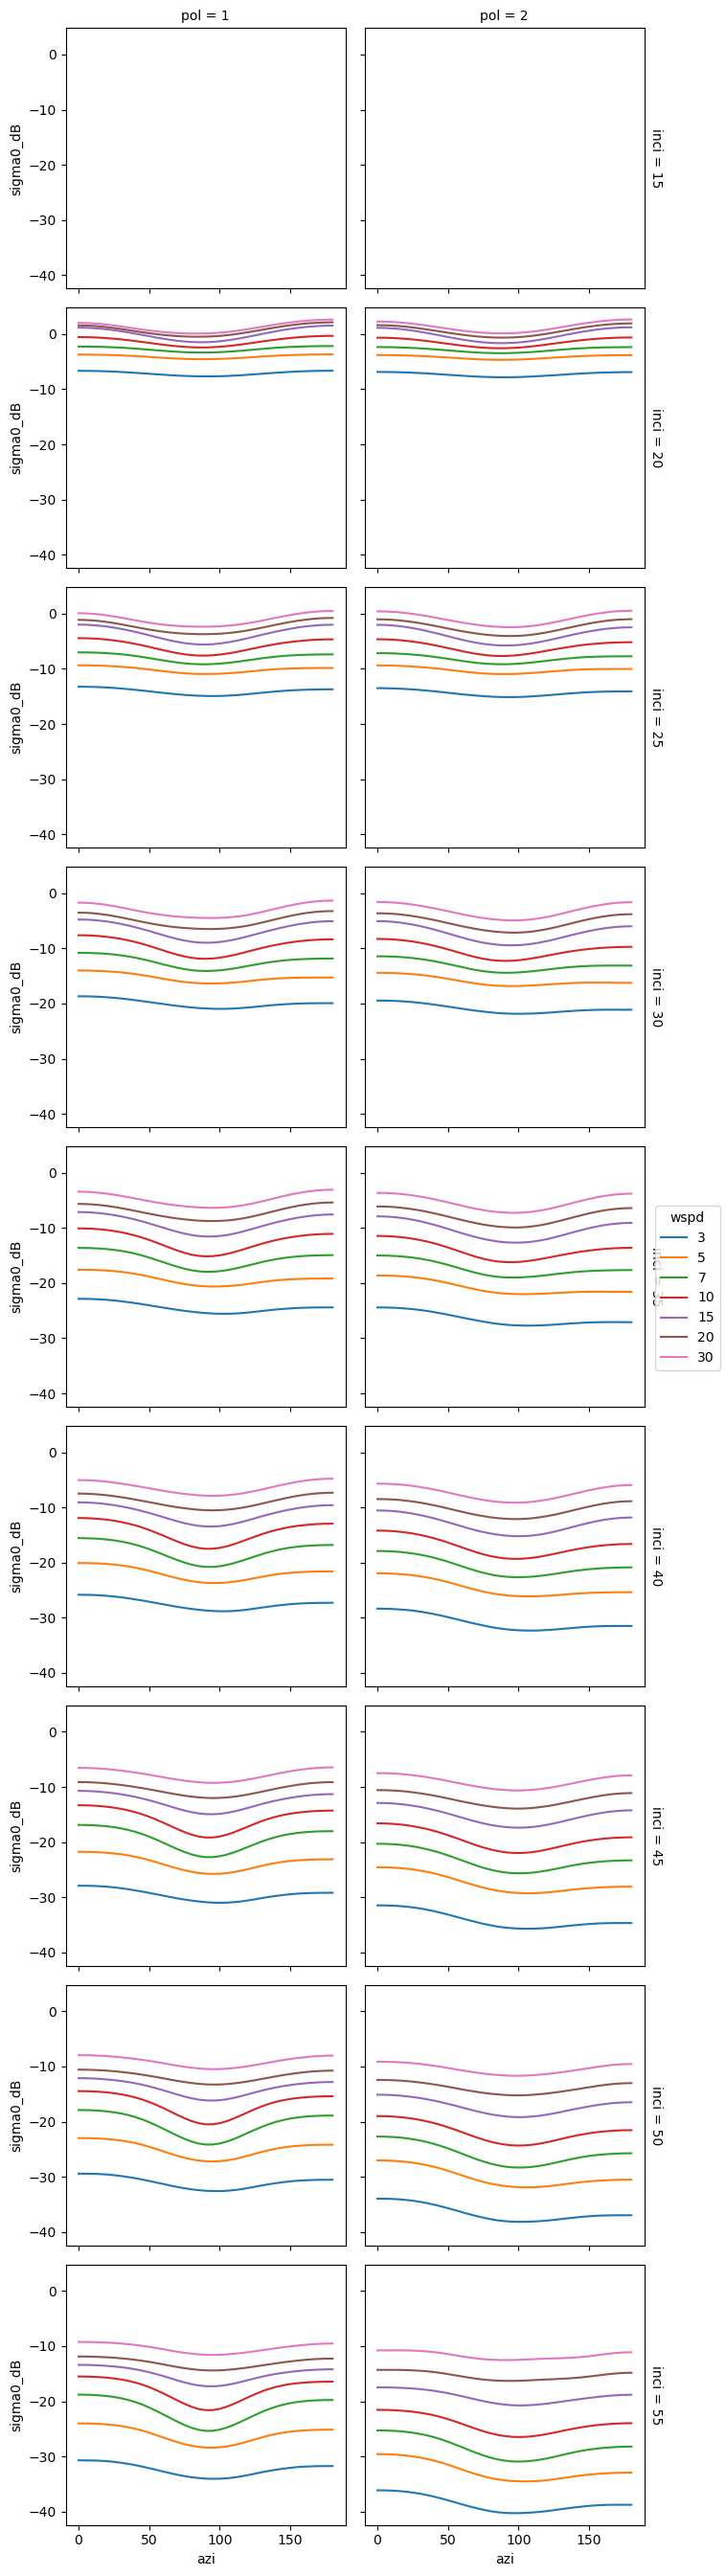

In [11]:
ds.sigma0_dB.plot(
    x='azi', hue='wspd', col='pol', row='inci',
)

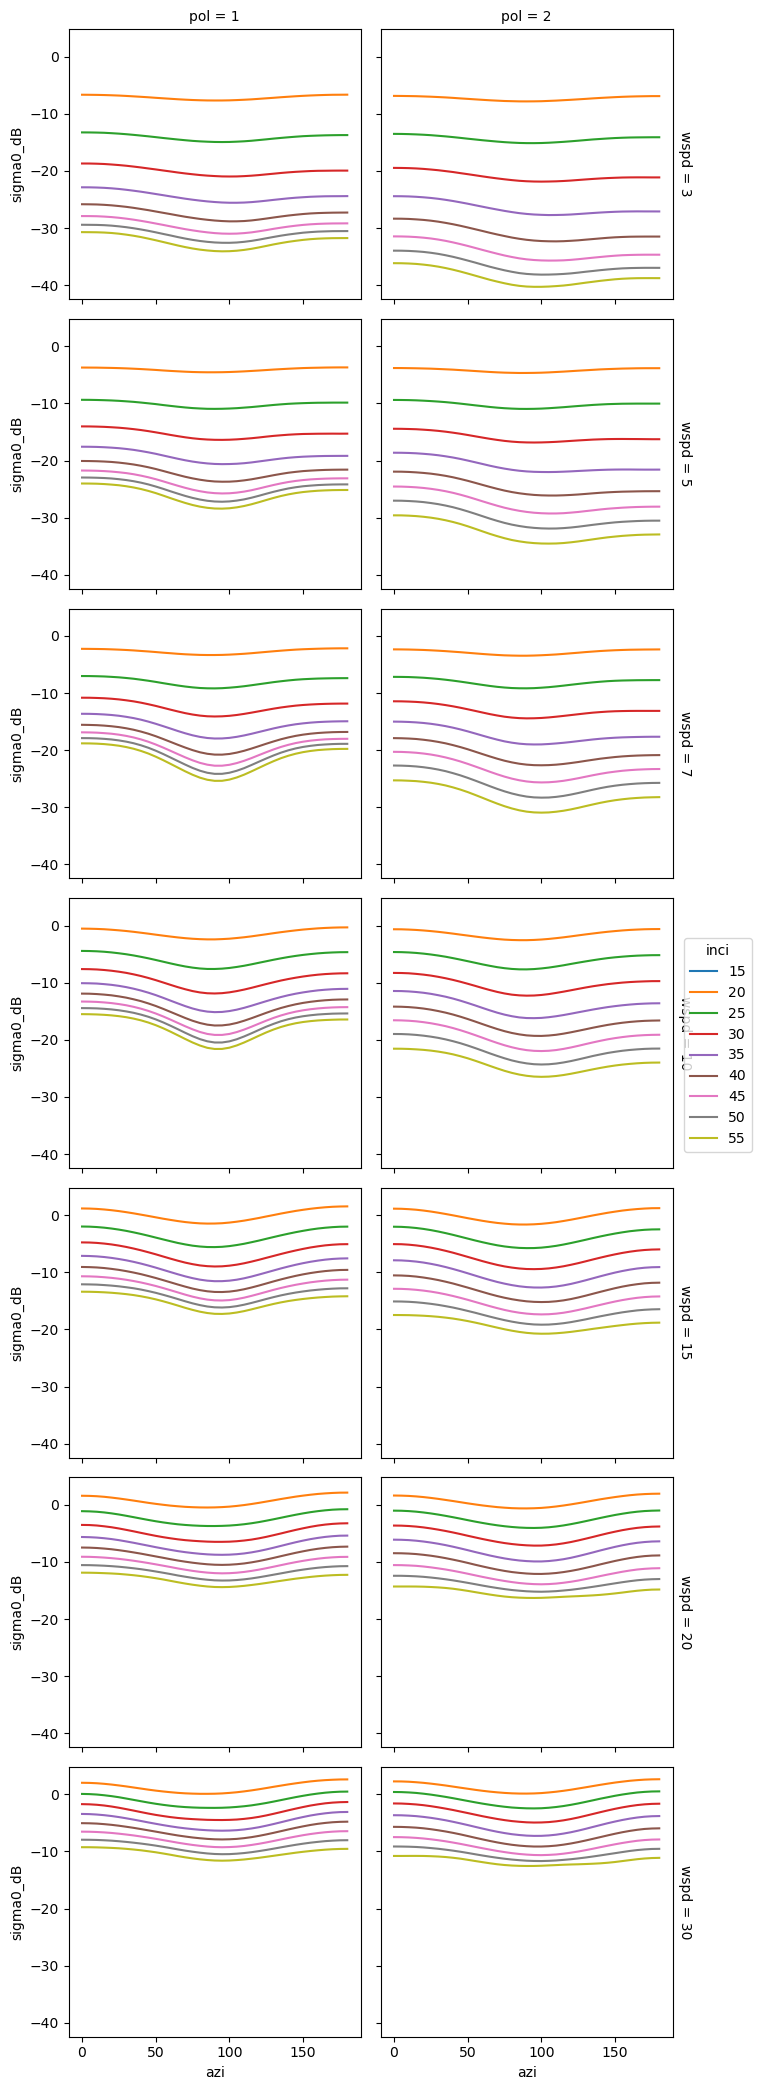

In [12]:
ds.sigma0_dB.plot(
    x='azi', hue='inci', col='pol', row='wspd',
)

# Test xr.DataArray as input

In [13]:
t, inci2D = np.mgrid[-10:10:1, 20:50:1]

In [14]:
wdir2D = 150+15*np.random.random_sample(inci2D.shape)
wspd2D = 7+2*np.random.random_sample(inci2D.shape)
pol2D = 1*np.ones(inci2D.shape)

In [15]:
ds = xr.Dataset(
    data_vars=dict(
        incidenceImage=(['x','y'], inci2D),
        wdir=(['x','y'], wdir2D),
        wspd=(['x','y'], wspd2D),
        pol=(['x','y'],pol2D)
    ),
)

In [16]:
ds['s0_lin'] = ss.gmfs.nrcs.nscat4ds(
    ds.wspd,
    ds.wdir,
    ds.incidenceImage,
    ds.pol,
)
ds['s0_dB'] = 10 * np.log10(ds['s0_lin'])

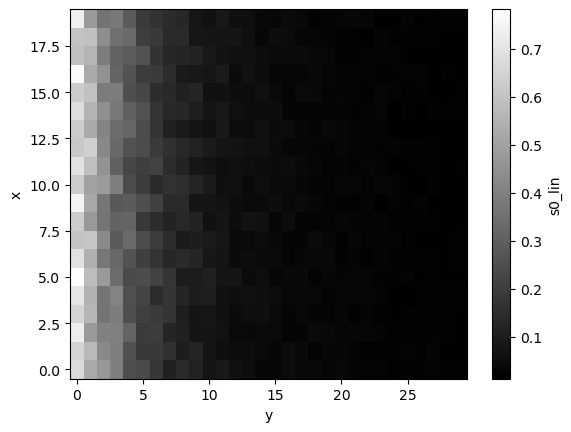

In [17]:
ds.s0_lin.plot(cmap='gist_gray',)

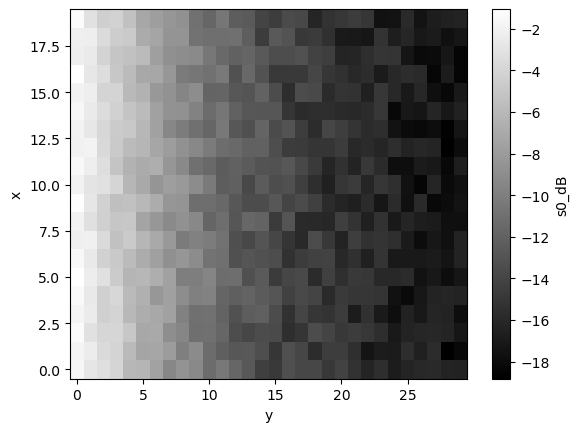

In [18]:
ds.s0_dB.plot(cmap='gist_gray',)

# Figures for SciReC paper

## GMF

In [19]:
wspd_target = [5, 9, 15]
azi_target = [0, 90]
pol_target = [1, 2]
inci_target = [20, 30, 40]

In [20]:
azi_lw = [2, .5]
azi_ls = ['-', '--']
azi_str = ['upwind', 'crosswind']
pol_ls = ['-', '--']
pol_lw = [2, .5]
pol_str = ['VV', 'HH']
wspd_lw = [.5, 1, 2]

In [21]:
sigma0_lim = [10**-3.2, 10**0.5]
inci_lim = [15, 45] # available data [16,65]
wspd_lim = [1, 20]

In [22]:
azi_step =  5
inci_step = 1
wspd_step = 1

pol   =  np.array([1, 2])
wspd  =  np.arange(1, 31, wspd_step)
theta =  np.arange(10, 61, inci_step)
azi   =  np.arange(0, 181, azi_step)

[wspd_mat, theta_mat, azi_mat, pol_mat] =  np.meshgrid(wspd, theta, azi, pol, indexing='ij')

In [23]:
s0_lin = ss.gmfs.nrcs.nscat4ds(
    wspd_mat,
    azi_mat,
    theta_mat,
    pol_mat,
)

In [24]:
ds = xr.Dataset(
    data_vars=dict(
        sigma0_lin=(['wspd','inci','azi','pol'], s0_lin)
    ),
    coords=dict(
        wspd=wspd,
        inci=theta,
        azi=azi,
        pol=pol
    )
)
ds.sigma0_lin.attrs['units'] = 'lin'
ds.sigma0_lin.attrs['long_name'] = 'sigma0'
ds.wspd.attrs['long_name'] = 'Wind Speed'
ds.wspd.attrs['units'] = 'm/s'
ds.inci.attrs['long_name'] = 'Incidence Angle'
ds.inci.attrs['units'] = '°'
ds.azi.attrs['long_name'] = 'Relative Azimuth Angle'
ds.azi.attrs['units'] = '°'

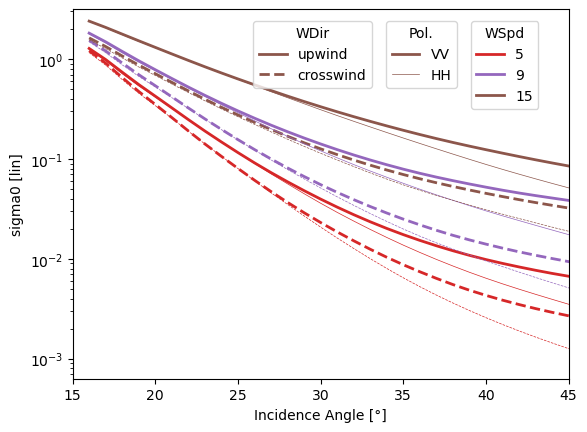

In [30]:
# colors = [plt.cm.winter(i) for i in np.linspace(1, 0, len(wpsd_target))]
colors = ['#d62728', '#9467bd', '#8c564b']

fig = plt.figure()
ax = plt.gca()
ax.set_prop_cycle('color', colors)
axs = [ [0]*3 for i in range( len(pol_target)*len(azi_target) )]
for pp, pol in enumerate(pol_target):
    for aa, azi in enumerate(azi_target):
        axs[aa + 2*pp][:]\
            = ds.sigma0_lin\
            .sel(azi=azi)\
            .sel(pol=pol)\
            .sel(wspd=wspd_target)\
            .plot(
                ax=ax,
                x='inci', hue='wspd',
                yscale='log', 
#                 lw=azi_lw[aa], ls=pol_ls[pp],
                lw=pol_lw[pp], ls=azi_ls[aa],
                add_legend=False,
                )
ax.set_title('')
ax.set_xlim(inci_lim)
ax.set_ylim(sigma0_lim)
fig.legend(axs[0][:], wspd_target, title='WSpd', loc='upper center', bbox_to_anchor=(0.8, 0.87))
fig.legend([axs[0][2], axs[1][2]], azi_str, title='WDir', loc='upper center', bbox_to_anchor=(0.5, 0.87))
fig.legend([axs[0][2], axs[2][2]], pol_str, title='Pol.', loc='upper center', bbox_to_anchor=(0.67, 0.87))

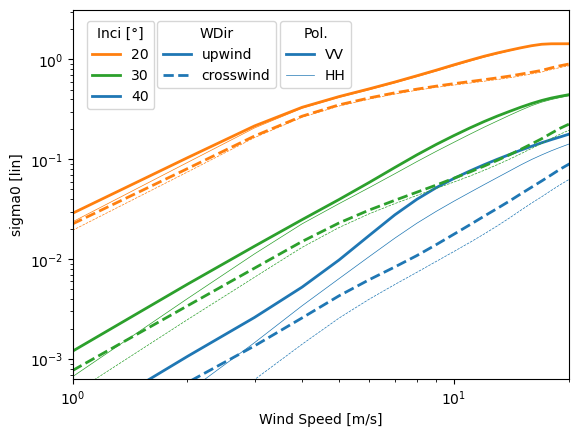

In [31]:
# colors = [plt.cm.winter(i) for i in np.linspace(1, 0, len(wpsd_target))]
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']

fig = plt.figure()
ax = plt.gca()
ax.set_prop_cycle('color', colors)
axs = [ [0]*len(inci_target) for i in range( len(pol_target)*len(azi_target) )]
for pp, pol in enumerate(pol_target):
    for aa, azi in enumerate(azi_target):
        axs[aa + 2*pp][:]\
            = ds.sigma0_lin\
            .sel(azi=azi)\
            .sel(pol=pol)\
            .sel(inci=inci_target)\
            .plot(
                ax=ax,
                x='wspd', hue='inci',
                yscale='log', xscale='log',
#                 lw=azi_lw[aa], ls=pol_ls[pp],
                lw=pol_lw[pp], ls=azi_ls[aa],
                add_legend=False,
                )
ax.set_title('')
ax.set_xlim(wspd_lim)
ax.set_ylim(sigma0_lim)
fig.legend(axs[0][:], inci_target, title='Inci [°]', loc='upper center', bbox_to_anchor=(0.2, 0.87))
fig.legend([axs[0][2], axs[1][2]], azi_str, title='WDir', loc='upper center', bbox_to_anchor=(0.35, 0.87))
fig.legend([axs[0][2], axs[2][2]], pol_str, title='Pol.', loc='upper center', bbox_to_anchor=(0.505, 0.87))

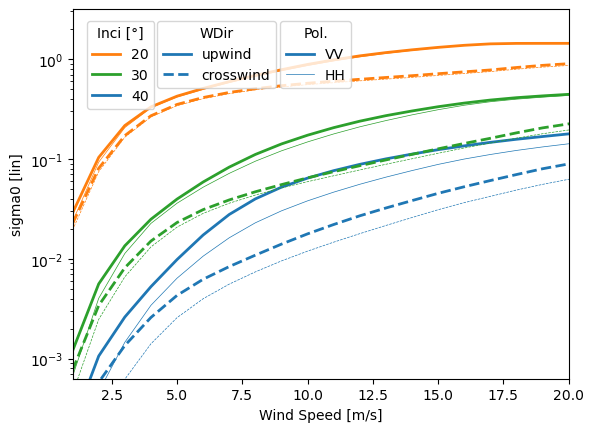

In [32]:
# colors = [plt.cm.winter(i) for i in np.linspace(1, 0, len(wpsd_target))]
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']

fig = plt.figure()
ax = plt.gca()
ax.set_prop_cycle('color', colors)
axs = [ [0]*len(inci_target) for i in range( len(pol_target)*len(azi_target) )]
for pp, pol in enumerate(pol_target):
    for aa, azi in enumerate(azi_target):
        axs[aa + 2*pp][:]\
            = ds.sigma0_lin\
            .sel(azi=azi)\
            .sel(pol=pol)\
            .sel(inci=inci_target)\
            .plot(
                ax=ax,
                x='wspd', hue='inci',
                yscale='log',
#                 lw=azi_lw[aa], ls=pol_ls[pp],
                lw=pol_lw[pp], ls=azi_ls[aa],
                add_legend=False,
                )
ax.set_title('')
ax.set_xlim(wspd_lim)
ax.set_ylim(sigma0_lim)
fig.legend(axs[0][:], inci_target, title='Inci [°]', loc='upper center', bbox_to_anchor=(0.2, 0.87))
fig.legend([axs[0][2], axs[1][2]], azi_str, title='WDir', loc='upper center', bbox_to_anchor=(0.35, 0.87))
fig.legend([axs[0][2], axs[2][2]], pol_str, title='Pol.', loc='upper center', bbox_to_anchor=(0.505, 0.87))

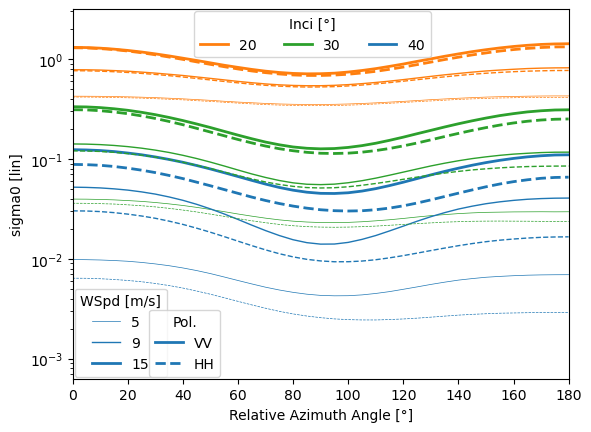

In [33]:
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']

fig = plt.figure()
ax = plt.gca()
ax.set_prop_cycle('color', colors)
axs = [ [0]*len(inci_target) for i in range( len(pol_target)*len(wspd_target) )]
for pp, pol in enumerate(pol_target):
    for ww, wspd in enumerate(wspd_target):
        axs[ww + 3*pp][:]\
            = ds.sigma0_lin\
            .sel(wspd=wspd)\
            .sel(pol=pol)\
            .sel(inci=inci_target)\
            .plot(
                ax=ax,
                x='azi', hue='inci',
                yscale='log',
                lw=wspd_lw[ww], ls=pol_ls[pp],
                add_legend=False,
                )
ax.set_title('')
ax.set_xlim([0,180])
ax.set_ylim(sigma0_lim)
fig.legend(axs[2][:], inci_target, title='Inci [°]', loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.89))
fig.legend([axs[0][2], axs[1][2], axs[2][2]], wspd_target, title='WSpd [m/s]', loc='lower center', bbox_to_anchor=(0.2, 0.1))
fig.legend([axs[2][2], axs[5][2]], pol_str, title='Pol.', loc='lower center', bbox_to_anchor=(0.3, 0.1))

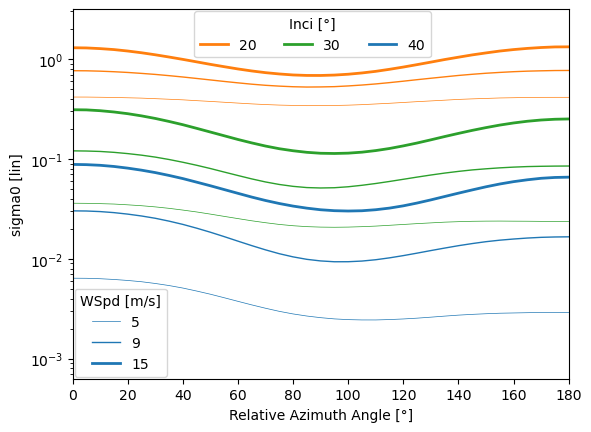

In [34]:
# colors = [plt.cm.winter(i) for i in np.linspace(1, 0, len(wpsd_target))]
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']

fig = plt.figure()
ax = plt.gca()
ax.set_prop_cycle('color', colors)
axs = [ [0]*len(inci_target) for i in range( len(wspd_target) )]
for ww, wspd in enumerate(wspd_target):
    axs[ww][:]\
        = ds.sigma0_lin\
        .sel(wspd=wspd)\
        .sel(pol=pol)\
        .sel(inci=inci_target)\
        .plot(
            ax=ax,
            x='azi', hue='inci',
            yscale='log',
            lw=wspd_lw[ww],
            add_legend=False,
                )
ax.set_title('')
ax.set_xlim([0,180])
ax.set_ylim([10**-3.2, 10**0.5])
fig.legend(axs[2][:], inci_target, title='Inci [°]', loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.89))
fig.legend([axs[0][2], axs[1][2], axs[2][2]], wspd_target, title='WSpd [m/s]', loc='lower center', bbox_to_anchor=(0.2, 0.1))